In [15]:
# 3.Convert XML label sang CSV. File CSV lưu trong thư mục split_data
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)

        for member in root.findall('object'):
            class_name = member.find('name').text
            xmin = int(member.find('bndbox/xmin').text)
            ymin = int(member.find('bndbox/ymin').text)
            xmax = int(member.find('bndbox/xmax').text)
            ymax = int(member.find('bndbox/ymax').text)

            value = (filename, width, height, class_name, xmin, ymin, xmax, ymax)
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
for directory in ['train','test']:
        image_path = os.path.join('/home/toonies/Learn/TensorBot-Vision/data/test_od/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/home/toonies/Learn/TensorBot-Vision/data/test_od/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')

Successfully converted xml to csv.
Successfully converted xml to csv.


In [3]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.

/home/toonies/Learn/TensorBot-Vision/notebooks/models/research


In [3]:
# 6. Cài dặt API
!cp object_detection/packages/tf2/setup.py . 
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Processing /home/toonies/Learn/TensorBot-Vision/notebooks/models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.2 MB/s eta 0:00:00
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696860 sha256=f44fe0db0c4c783eff997c89e8ab3e9d97cfcf2f2db78e99641f390bfda825f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-nvob4b9r/wheels/ef/16/13/3147b8a6eccb81c6931fe949fbde297c68410d097163e6d294
Successfully built object-detection
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflo

In [4]:
# 7. Test API
# Error: https://github.com/lhelontra/tensorflow-on-arm/issues/13
!python object_detection/builders/model_builder_tf2_test.py

2023-11-25 11:34:08.551624: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:34:08.594728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 11:34:08.594760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 11:34:08.595603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 11:34:08.601182: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:34:08.601362: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:

# 8. CSV to TFRecord. With help from MiAI git hub
%cd /home/toonies/Learn/TensorBot-Vision/utils
import os

if not os.path.exists("/home/toonies/Learn/TensorBot-Vision/data/test_od/tfrecord_data/"):
  os.mkdir("/home/toonies/Learn/TensorBot-Vision/data/test_od/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/home/toonies/Learn/TensorBot-Vision/data/test_od/train --csv_input=/home/toonies/Learn/TensorBot-Vision/data/test_od/train_labels.csv --output_path=/home/toonies/Learn/TensorBot-Vision/data/test_od/tfrecord_data/train.tfrecord 
!python generate_tfrecord.py --image_dir=/home/toonies/Learn/TensorBot-Vision/data/test_od/test --csv_input=/home/toonies/Learn/TensorBot-Vision/data/test_od/test_labels.csv --output_path=/home/toonies/Learn/TensorBot-Vision/data/test_od/tfrecord_data/test.tfrecord 


/home/toonies/Learn/TensorBot-Vision/utils


2023-11-25 11:36:02.369987: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:36:02.423617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 11:36:02.423662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 11:36:02.424624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 11:36:02.431541: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:36:02.431781: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
# 9. Download pretrain and config
if not os.path.exists("/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained"):
  os.mkdir("/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained")

%cd /home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Edit line: 3, 165, 171, 135, 175, 177 185, 189

/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained
--2023-11-25 11:36:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 

142.250.204.123, 172.217.24.123, 142.250.66.155, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.204.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  10,9MB/s    in 1,8s    

2023-11-25 11:36:32 (10,9 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/s

In [1]:
# train
%cd /home/toonies/Learn/TensorBot-Vision/notebooks/models/research/object_detection

#train 
!python model_main_tf2.py \
--pipeline_config_path=/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/output_model --alsologtostderr --num_train_steps=10

/home/toonies/Learn/TensorBot-Vision/notebooks/models/research/object_detection
2023-11-25 16:08:57.248481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:08:57.399875: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:08:57.400589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 16:08:58.642731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-25 16:09:03.170784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retu

In [2]:
%cd /home/toonies/Learn/TensorBot-Vision/notebooks/models/research/object_detection
!python exporter_main_v2.py \
--trained_checkpoint_dir=/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/output_model \
--pipeline_config_path=/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/export_model

/home/toonies/Learn/TensorBot-Vision/notebooks/models/research/object_detection
2023-11-25 16:16:39.847380: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:16:39.886087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:16:39.886457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 16:16:41.149939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-25 16:16:43.461845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retu

In [1]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/home/toonies/Learn/TensorBot-Vision/notebooks/models/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model")
     

2023-11-25 20:07:10.165943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 20:07:10.327092: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 20:07:10.328056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 20:07:11.709515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-25 20:07:14.078897: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

In [2]:
# Các hàm inference

import cv2
def run_inference_for_single_image(model, image):
  
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.01,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

Done load image 
Done inference
Done draw on image 


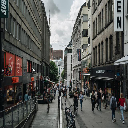

In [4]:
category_index = label_map_util.create_category_index_from_labelmap("/home/toonies/Learn/TensorBot-Vision/data/test_od/label_map.pbtxt", use_display_name=True)

image_path = '/home/toonies/Learn/TensorBot-Vision/data/test_od/test/photo-1634985492349-8589a9255cbe_jpg.rf.4f36728b2a976d7e05846712482d7c2f.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
print("Done draw on image ")
display(Image.fromarray(image_np))